0
Number of layouts: 2

Layout name: Layout1
Layout type: Not available

Layout name: Model
Layout type: Not available
    LWPOLYLINE: Position (9795.0, 9995.0, 0.0, 0.0, 0.0)
    LWPOLYLINE: Position (205.0, 9795.0, 0.0, 0.0, 0.0)
    LWPOLYLINE: Position (5.0, 5.0, 0.0, 0.0, 0.0)
    LWPOLYLINE: Position (205.0, 205.0, 0.0, 0.0, 0.0)
    LWPOLYLINE: Position (5.0, 9700.0, 0.0, 0.0, 0.0)
    LWPOLYLINE: Position (2.5, 100.0, 0.0, 0.0, 0.0)
    LWPOLYLINE: Position (100.0, 2.5, 0.0, 0.0, 0.0)
    LWPOLYLINE: Position (2.5, 10100.0, 0.0, 0.0, 0.0)
    LWPOLYLINE: Position (100.0, 10002.5, 0.0, 0.0, 0.0)
    LWPOLYLINE: Position (-9995.0, 9700.0, 0.0, 0.0, 0.0)
    LWPOLYLINE: Position (-9997.5, 100.0, 0.0, 0.0, 0.0)
    LWPOLYLINE: Position (-9997.5, 10100.0, 0.0, 0.0, 0.0)
    LWPOLYLINE: Position (-9527.39, 291.0, 0.0, 0.0, 0.0)
    LWPOLYLINE: Position (-9060.813, 291.0, 0.0, 0.0, 0.0)
    LWPOLYLINE: Position (-8860.813, 646.798, 0.0, 0.0, 0.0)
    LWPOLYLINE: Position (-8509.925, 2

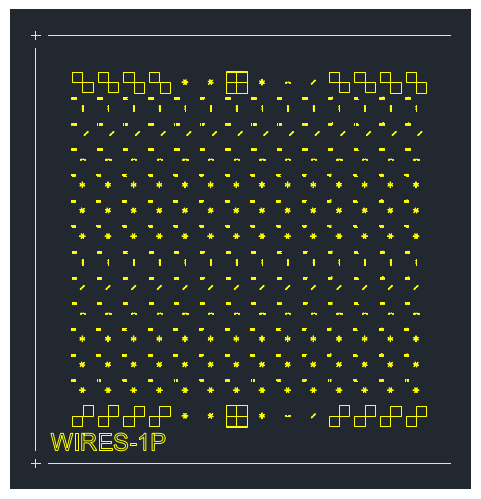

In [16]:
import ezdxf
import os

folder = r'C:\Users\jc2713\OneDrive - Imperial College London (1)\Projects\Japan2024_May_KSAV\Japan_visit\Sample_design\AlexFab'
file = r'Hall-FMR_v2.1-20211117_original.dxf'
path = os.path.join(folder, file)


import sys
import matplotlib.pyplot as plt
from ezdxf import recover
from ezdxf.addons.drawing import RenderContext, Frontend
from ezdxf.math import BoundingBox2d
from ezdxf.addons.drawing.matplotlib import MatplotlibBackend

# Safe loading procedure (requires ezdxf v0.14):
try:
    doc, auditor = recover.readfile(path)
except IOError:
    print(f'Not a DXF file or a generic I/O error.')
    sys.exit(1)
except ezdxf.DXFStructureError:
    print(f'Invalid or corrupted DXF file.')
    sys.exit(2)

def get_entity_position(entity):
    """Get the position of an entity based on its type."""
    if hasattr(entity, 'dxf'):
        if hasattr(entity.dxf, 'insert'):
            return entity.dxf.insert
        elif hasattr(entity.dxf, 'start'):
            return entity.dxf.start
        elif hasattr(entity.dxf, 'center'):
            return entity.dxf.center
        elif hasattr(entity, 'get_points'):
            points = entity.get_points()
            if points:
                return points[0]
    return None

units = doc.header["$INSUNITS"]
print(units)
# Read all layouts
layouts = doc.layouts

print(f"Number of layouts: {len(layouts)}")

# Define the area of interest (adjust these values as needed)
area_of_interest = BoundingBox2d(((-1000000000, -1000000000),(100000000,100000000)))

for layout in layouts:
    print(f"\nLayout name: {layout.name}")
    
    # Try to get the layout type, if available
    try:
        layout_type = layout.dxf.layout_type
        print(f"Layout type: {layout_type}")
    except ezdxf.DXFAttributeError:
        print("Layout type: Not available")
    entities_by_color = {}
    # Get all entities in the layout
    entities = layout.query('*')
    for entity in entities:
        # Check if entity is within the area of interest
        position = get_entity_position(entity)
        if position:
            print(f"    {entity.dxftype()}: Position {position}")
        else:
            print(f"    {entity.dxftype()}: Position not there")
        if position[0] > 0 or position[1]<0:
            layout.delete_entity(entity)    
    #     if hasattr(entity, 'dxf') and hasattr(entity.dxf, 'bbox'):
    #         entity_bbox = entity.dxf.bbox
    #         if entity_bbox and area_of_interest.intersect(entity_bbox):
    #             color = entity.dxf.color
    #             if color not in entities_by_color:
    #                 entities_by_color[color] = []
    #             entities_by_color[color].append(entity)
    #         else:
    #             layout.delete_entity(entity)
    # print(f"Number of entities in this layout: {len(entities)}")
    # # Print information about entities by color
    # print(f"Number of entities after filtering: {sum(len(entities) for entities in entities_by_color.values())}")
    # print("Entities by color:")
    # for color, entities in entities_by_color.items():
    #     print(f"  Color {color}: {len(entities)} entities")
    
    # # Print the types of entities
    # entity_types = set(entity.dxftype() for entity in entities)
    # print("Entity types in this layout:", ", ".join(entity_types))

# The auditor.errors attribute stores severe errors,
# which may raise exceptions when rendering.
if not auditor.has_errors:
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ctx = RenderContext(doc)
    out = MatplotlibBackend(ax)
    Frontend(ctx, out).draw_layout(doc.modelspace(), finalize=True)
    fig.savefig(os.path.join(folder,'your.png'), dpi=300)





0
Layout type: Not available
Layout type: Not available
Adding rectangle: position=(1.0, 2.4), width=1, height=4, angle=0
Adding rectangle: position=(1.0, 3.0), width=1, height=4, angle=45
Adding rectangle: position=(1.0, 3.5999999999999996), width=1, height=4, angle=90
Adding rectangle: position=(11.0, 2.4), width=1, height=4, angle=0
Adding rectangle: position=(11.0, 3.0), width=1, height=4, angle=45
Adding rectangle: position=(11.0, 3.5999999999999996), width=1, height=4, angle=90
Adding rectangle: position=(21.0, 2.4), width=1, height=4, angle=0
Adding rectangle: position=(21.0, 3.0), width=1, height=4, angle=45
Adding rectangle: position=(21.0, 3.5999999999999996), width=1, height=4, angle=90
Adding rectangle: position=(31.0, 2.4), width=1, height=4, angle=0
Adding rectangle: position=(31.0, 3.0), width=1, height=4, angle=45
Adding rectangle: position=(31.0, 3.5999999999999996), width=1, height=4, angle=90
Adding rectangle: position=(41.0, 2.4), width=1, height=4, angle=0
Adding r

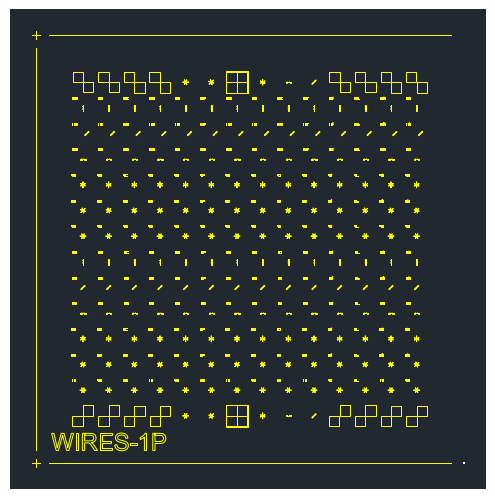

In [7]:
import ezdxf
import os
import math

folder = r'C:\Users\jc2713\OneDrive - Imperial College London (1)\Projects\Japan2024_May_KSAV\Japan_visit\Sample_design\AlexFab'
file = r'Hall-FMR_v2.1-20211117_original.dxf'
path = os.path.join(folder, file)


import sys
import matplotlib.pyplot as plt
from ezdxf import recover
from ezdxf.addons.drawing import RenderContext, Frontend
from ezdxf.math import BoundingBox2d, Vec2, Matrix44
from ezdxf.addons.drawing.matplotlib import MatplotlibBackend

# Safe loading procedure (requires ezdxf v0.14):
try:
    doc, auditor = recover.readfile(path)
except IOError:
    print(f'Not a DXF file or a generic I/O error.')
    sys.exit(1)
except ezdxf.DXFStructureError:
    print(f'Invalid or corrupted DXF file.')
    sys.exit(2)

def get_entity_position(entity):
    """Get the position of an entity based on its type."""
    if hasattr(entity, 'dxf'):
        if hasattr(entity.dxf, 'insert'):
            return entity.dxf.insert
        elif hasattr(entity.dxf, 'start'):
            return entity.dxf.start
        elif hasattr(entity.dxf, 'center'):
            return entity.dxf.center
        elif hasattr(entity, 'get_points'):
            points = entity.get_points()
            if points:
                return points[0]
    return None

units = doc.header["$INSUNITS"]
print(units)
# Read all layouts
layouts = doc.layouts

msp = doc.modelspace()


#print(f"Number of layouts: {len(layouts)}")

# Define the area of interest (adjust these values as needed)
area_of_interest = BoundingBox2d(((-1000000000, -1000000000),(100000000,100000000)))

for layout in layouts:
    #print(f"\nLayout name: {layout.name}")
    
    # Try to get the layout type, if available
    try:
        layout_type = layout.dxf.layout_type
        #print(f"Layout type: {layout_type}")
    except ezdxf.DXFAttributeError:
        print("Layout type: Not available")
    entities_by_color = {}
    # Get all entities in the layout
    entities = layout.query('*')
    for entity in entities:
        # Check if entity is within the area of interest
        position = get_entity_position(entity)
        if position:
            pass
            #print(f"    {entity.dxftype()}: Position {position}")
        else:
            print(f"    {entity.dxftype()}: Position not there")
        if position[0] > 0 or position[1]<0:
            layout.delete_entity(entity)  

def add_rectangle(msp, position, width, height, angle=0, color=1):
    """
    Add a rectangle to the modelspace.
    """
    print(f"Adding rectangle: position={position}, width={width}, height={height}, angle={angle}")
    half_width = width / 2
    half_height = height / 2
    points = [
        (-half_width, -half_height),
        (half_width, -half_height),
        (half_width, half_height),
        (-half_width, half_height),
    ]
    rect = msp.add_lwpolyline([(0, 0), (10, 0), (10, 5), (0, 5), (0, 0)])

    # Rotate rectangle
    angle = math.radians(angle)  # 45 degree rotation
    rotation_matrix = Matrix44.z_rotate(angle)
    rect.transform(rotation_matrix)
    
    

def create_unit_cell(msp, origin, cell_size, rectangle_params):
    """
    Create a unit cell with rectangles.
    
    :param msp: Modelspace to add the rectangles to
    :param origin: Tuple (x, y) for the origin of the unit cell
    :param cell_size: Tuple (width, height) of the unit cell
    :param rectangle_params: List of dictionaries, each containing parameters for a rectangle
    """
    for params in rectangle_params:
        # Calculate absolute position within the unit cell
        abs_position = (
            origin[0] + params['position'][0] * cell_size[0],
            origin[1] + params['position'][1] * cell_size[1]
        )
        add_rectangle(msp, abs_position, params['width'], params['height'], params['angle'], params['color'])

def create_array(msp, origin, cell_size, array_size, rectangle_params):
    """
    Create an array of unit cells.
    
    :param msp: Modelspace to add the rectangles to
    :param origin: Tuple (x, y) for the origin of the array
    :param cell_size: Tuple (width, height) of each unit cell
    :param array_size: Tuple (rows, columns) for the number of unit cells
    :param rectangle_params: List of dictionaries, each containing parameters for a rectangle in the unit cell
    """
    for row in range(array_size[0]):
        for col in range(array_size[1]):
            cell_origin = (
                origin[0] + col * cell_size[0],
                origin[1] + row * cell_size[1]
            )
            create_unit_cell(msp, cell_origin, cell_size, rectangle_params)

# Create a new DXF document
#doc = ezdxf.new('R2010')
#msp = doc.modelspace()

cell_size = (10, 10)  # 10x10 unit cell
rectangle_params = [
    {'position': (0.1, 0.24), 'width': 1, 'height': 4, 'angle': 0, 'color': 1},
    {'position': (0.1, 0.30), 'width': 1, 'height': 4, 'angle': 45, 'color': 2},
    {'position': (0.1, 0.36), 'width': 1, 'height': 4, 'angle': 90, 'color': 3}
]

# Define the unit cell
#cell_size = (10, 10)  # 10x10 unit cell
#rectangle_params = [
#    {'position': (-9400, 2400), 'width': 10, 'height': 40, 'angle': 0, 'color': 1},
#    {'position': (-9400, 3000), 'width': 10, 'height': 40, 'angle': 45, 'color': 2},
#    {'position': (-9400, 3600), 'width': 10, 'height': 40, 'angle': 90, 'color': 3}
#]

# Create an array of 5x5 unit cells
array_origin = (0, 0)
array_size = (5, 5)

create_array(msp, array_origin, cell_size, array_size, rectangle_params)

# Save the document
if not auditor.has_errors:
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ctx = RenderContext(doc)
    out = MatplotlibBackend(ax)
    Frontend(ctx, out).draw_layout(doc.modelspace(), finalize=True)
    fig.savefig(os.path.join(folder,'your.png'), dpi=300)